### NEURAL NETWORK BACK PROPAGATION 

In [1]:
#Defining our training dataset
# Input = A = (Ac, Am),
# Ac = Amplitude of the carrier Signal
# Am = Amplitude of message signal
# y = Output = Amplitude of Modulated Signal

In [2]:
import numpy as np

In [3]:
# Define the data generator to generate random input signals which will work with the "model" defined here to produce outputs

def dataGenerator(r, c):
    samples_A = np.random.randint(1,10, (r, c))
    samples_y = np.array([], dtype = float)
    wT = 6
    for rows in samples_A:
        #t = rows[0]*10 + 5*rows[1]**2 + 4  # model y = 10A1 + 5A2^2 + 4
        model = rows[0]* np.sin(wT) + rows[1]**2*np.cos(wT) + 4  
        samples_y = np.append(samples_y, model)
    
    samples_A = samples_A.astype(np.float64)
    samples_y = samples_y.astype(np.float64).reshape(r, 1)
    return (samples_A, samples_y)
    

In [4]:
solution = dataGenerator(100,2) #change the first argument here to increase the number of generated input random signals
A = solution[0]
y = solution[1]
print('Value for A:\n', A)
print('Value for y:\n', y)

Value for A:
 [[9. 6.]
 [4. 5.]
 [6. 5.]
 [2. 1.]
 [1. 7.]
 [7. 3.]
 [7. 4.]
 [3. 1.]
 [2. 8.]
 [1. 1.]
 [6. 5.]
 [8. 6.]
 [8. 7.]
 [1. 3.]
 [7. 7.]
 [5. 6.]
 [4. 4.]
 [2. 5.]
 [5. 7.]
 [2. 4.]
 [3. 7.]
 [6. 4.]
 [7. 4.]
 [5. 1.]
 [2. 9.]
 [5. 1.]
 [8. 3.]
 [7. 8.]
 [5. 6.]
 [3. 7.]
 [7. 8.]
 [7. 3.]
 [2. 1.]
 [3. 1.]
 [5. 1.]
 [3. 6.]
 [5. 3.]
 [1. 9.]
 [3. 3.]
 [5. 2.]
 [4. 5.]
 [9. 5.]
 [6. 6.]
 [1. 2.]
 [4. 6.]
 [6. 2.]
 [5. 4.]
 [7. 3.]
 [1. 2.]
 [5. 6.]
 [3. 3.]
 [3. 2.]
 [2. 1.]
 [6. 8.]
 [9. 1.]
 [9. 2.]
 [1. 4.]
 [7. 8.]
 [2. 4.]
 [4. 5.]
 [2. 1.]
 [9. 2.]
 [3. 9.]
 [1. 5.]
 [6. 9.]
 [1. 7.]
 [7. 6.]
 [4. 1.]
 [9. 6.]
 [7. 9.]
 [5. 3.]
 [7. 3.]
 [1. 8.]
 [9. 3.]
 [6. 8.]
 [1. 5.]
 [4. 1.]
 [7. 4.]
 [4. 4.]
 [5. 9.]
 [9. 2.]
 [5. 6.]
 [7. 8.]
 [4. 2.]
 [9. 6.]
 [9. 2.]
 [9. 4.]
 [6. 5.]
 [5. 5.]
 [1. 7.]
 [2. 9.]
 [8. 8.]
 [5. 8.]
 [4. 4.]
 [8. 9.]
 [6. 1.]
 [7. 8.]
 [5. 5.]
 [5. 6.]
 [3. 8.]]
Value for y:
 [[36.05139084]
 [26.88659517]
 [26.32776418]
 [ 4.40133929]
 [50.768928

In [5]:
np.shape(y) #shape of the output

(100, 1)

In [6]:
# scale x and y by dividing x with the max of the input array and dividing y by 100
A = A/np.amax(A, axis=0)
y = y/100 

print(A)
print(y)

[[1.         0.66666667]
 [0.44444444 0.55555556]
 [0.66666667 0.55555556]
 [0.22222222 0.11111111]
 [0.11111111 0.77777778]
 [0.77777778 0.33333333]
 [0.77777778 0.44444444]
 [0.33333333 0.11111111]
 [0.22222222 0.88888889]
 [0.11111111 0.11111111]
 [0.66666667 0.55555556]
 [0.88888889 0.66666667]
 [0.88888889 0.77777778]
 [0.11111111 0.33333333]
 [0.77777778 0.77777778]
 [0.55555556 0.66666667]
 [0.44444444 0.44444444]
 [0.22222222 0.55555556]
 [0.55555556 0.77777778]
 [0.22222222 0.44444444]
 [0.33333333 0.77777778]
 [0.66666667 0.44444444]
 [0.77777778 0.44444444]
 [0.55555556 0.11111111]
 [0.22222222 1.        ]
 [0.55555556 0.11111111]
 [0.88888889 0.33333333]
 [0.77777778 0.88888889]
 [0.55555556 0.66666667]
 [0.33333333 0.77777778]
 [0.77777778 0.88888889]
 [0.77777778 0.33333333]
 [0.22222222 0.11111111]
 [0.33333333 0.11111111]
 [0.55555556 0.11111111]
 [0.33333333 0.66666667]
 [0.55555556 0.33333333]
 [0.11111111 1.        ]
 [0.33333333 0.33333333]
 [0.55555556 0.22222222]


In [7]:
np.shape(A)

(100, 2)

In [8]:
#providing initial values for the layers of the neural network we use OOP 
class NeuralNetwork(object):
    def __init__(self):
#parameters for the Four layers of our neural network
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize1 = 3
        self.hiddenSize2 = 3
        
        
#weights: Assigning random weights to the first input
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize1) # (2x3) weight matrix moving from input to hidden layer1
        self.W2 = np.random.randn(self.hiddenSize1, self.hiddenSize2) # (3x3) weight matrix moving from hiddenlayer1 to hidden layer2
        self.W3 = np.random.randn(self.hiddenSize2, self.outputSize) # (3x1) weight matrix from hidden2 to output layer
        
#The Activation function which converts a number to a probability i.e between 0 and 1 
    def sigmoid(self, s, deriv=False): #in backpropagation we use the derivative of the sigmoid to find the tangent slope 
        if (deriv == True):
            return s * (1 - s) #derivative of the sigmoid
        return 1/(1 + np.exp(-s))
    
    
#forward propogation through the Neural Network
    def feedForward(self, A):
        self.z = np.dot(A, self.W1) #The dot product of input (A) and first set of weights (2x3) matrix above
        self.z2 = self.sigmoid(self.z) #output produced after activation function is applied to the incoming input (self.z)
        
        self.z12 = np.dot(self.z2, self.W2) #The dot product of input to hidden layer 1 and second set of weights (3x3) matrix above
        self.z22 = self.sigmoid(self.z12) #output produced after activation function is applied to the incoming input (self.z12)
        
        self.z3 = np.dot(self.z22, self.W3) #dot product of hidden layer 2 (output of the sigmoid fxn above) and third set of weights (3x1)
        output = self.sigmoid(self.z3) #Applying the sigmoid fxn on the fourth layer we get the output
        return output
    
    
    
#backward propogation through the neural network
    def backward(self, A, y, output):
        self.output_error = y - output # error in output
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        
        self.z22_error = self.output_delta.dot(self.W3.T)#z22 error: how much our hidden layer 1 weights contribute to output error using chainrule (partial dirivation)
        self.z22_delta = self.z22_error * self.sigmoid(self.z22, deriv=True)
        
        
        self.z2_error = self.z22_delta.dot(self.W2.T) #z2 error: how much our hidden layer 2 weights contribute to output error using chainrule (partial dirivation)
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) #applying derivative of sigmoid to z2 error
        
        self.W1 += A.T.dot(self.z2_delta) # adjusting first set (input -> hidden) weights
        self.W2 += self.z2.T.dot(self.z22_delta) # adjusting second set (hidden -> hidden) weights   
        self.W3 += self.z2.T.dot(self.output_delta) # adjusting third set (hidden -> output) weight
        
        
#Training the neural network
    def train(self, A, y):
        output = self.feedForward(A)
        self.backward(A, y, output)

In [9]:
NN = NeuralNetwork()
losses_list = []
iter_list = []
for i in range(1000): #trains the neural network (NN) 1000 times
    if (i % 100 == 0):
        losses_list.append(np.mean(np.square(y - NN.feedForward(A))))
        iter_list.append(i)
        print("Loss: " + str(np.mean(np.square(y - NN.feedForward(A)))))
    NN.train(A, y)
        
print("Input: " + str(A))
print("Actual Output: " + str(y))
print("Loss: " + str(np.mean(np.square(y - NN.feedForward(A)))))
print("\n")
print("Predicted Output: " + str(NN.feedForward(A)))        

Loss: 0.0867534310853802
Loss: 0.04854478990959276
Loss: 0.012235999463299395
Loss: 0.0067178720909981645
Loss: 0.017319443187944563
Loss: 0.006951231729625357
Loss: 0.020722046659893904
Loss: 0.010987943371928377
Loss: 0.010154606911686553
Loss: 0.009417415723172265
Input: [[1.         0.66666667]
 [0.44444444 0.55555556]
 [0.66666667 0.55555556]
 [0.22222222 0.11111111]
 [0.11111111 0.77777778]
 [0.77777778 0.33333333]
 [0.77777778 0.44444444]
 [0.33333333 0.11111111]
 [0.22222222 0.88888889]
 [0.11111111 0.11111111]
 [0.66666667 0.55555556]
 [0.88888889 0.66666667]
 [0.88888889 0.77777778]
 [0.11111111 0.33333333]
 [0.77777778 0.77777778]
 [0.55555556 0.66666667]
 [0.44444444 0.44444444]
 [0.22222222 0.55555556]
 [0.55555556 0.77777778]
 [0.22222222 0.44444444]
 [0.33333333 0.77777778]
 [0.66666667 0.44444444]
 [0.77777778 0.44444444]
 [0.55555556 0.11111111]
 [0.22222222 1.        ]
 [0.55555556 0.11111111]
 [0.88888889 0.33333333]
 [0.77777778 0.88888889]
 [0.55555556 0.66666667]


In [10]:
import matplotlib.pyplot as plt

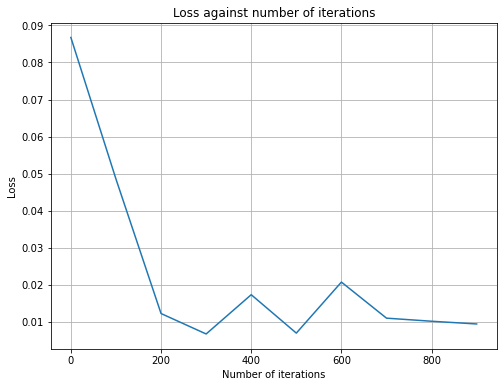

In [11]:
plt.figure(figsize=(8,6))
plt.plot(iter_list,losses_list)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss against number of iterations')
plt.grid()
plt.savefig('loss_graph.png')